<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Chromebooki_rev_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 1.2 MB/s eta 0:00:00


In [10]:
import pymcdm as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import pi

In [3]:
# Dane o Chromebookach w formie listy list bez kolumny z nazwą modelu
# Kolejność kolumn: Cena, Przekątna ekranu, Full HD, IPS, RAM, Pojemność pamięci, Qwerty PL, Moc procesora, EOL,
chromebooks = np.array([
    [325, 11, 0, 1, 4, 32, 0, 2436, 2],  # Acer Spin 511
    [259, 11, 0, 1, 4, 32, 0, 1178, 0],  # Acer R11
    [339, 11, 0, 0, 4, 32, 0, 1423, 0],  # ASUS Chromebook C214M
    [300, 14, 1, 0, 8, 64, 0, 2867, 5],  # ASUS CHROMEBOOK C433T
    [309, 14, 1, 0, 8, 64, 0, 1107, 3],  # Asus Chromebook C523N
    [198, 11, 0, 0, 4, 32, 0, 1413, 0],  # Dell Chromebook 11
    [149, 11, 0, 0, 4, 32, 0, 661, 0],   # Dell Chromebook 11 3189
    [199, 11, 0, 0, 4, 32, 0, 1550, 5],  # Dell Chromebook 3100
    [169, 11, 0, 0, 4, 32, 0, 1107, 3],  # Dell Chromebook 5190
    [299, 11, 0, 0, 4, 32, 0, 1987, 5],  # HP 11 G8 EE
    [149, 11, 0, 0, 4, 32, 1, 2436, 5],  # HP Chromebook 11 G8
    [175, 11, 0, 0, 4, 32, 0, 812, 2],   # HP Chromebook 11A G8
    [349, 14, 0, 1, 4, 32, 0, 1031, 5],  # HP Chromebook 14 G4
    [310, 14, 1, 1, 8, 64, 1, 3151, 7],  # HP Chromebook 14b-na0245nd
    [579, 14, 1, 1, 8, 32, 0, 2271, 4],  # HP Chromebook X360 14 G1
    [199, 11, 0, 1, 4, 32, 0, 1550, 5],  # HP Chromebook X360 G3
    [350, 14, 1, 1, 8, 32, 0, 2218, 1],  # HP x360 14 G1
    [599, 14, 1, 0, 8, 64, 0, 3350, 3],  # HP X360 14 G1 i3
    [329, 11, 0, 1, 4, 32, 0, 2436, 5],  # Lenovo Chromebook 300E
    [299, 11, 0, 1, 4, 32, 1, 1986, 5],  # Lenovo Chromebook 500E II
])

# Nazwy Chromebooków
chromebook_names = [
    "Acer Spin 511", "Acer R11", "ASUS Chromebook C214M", "ASUS CHROMEBOOK C433T", "Asus Chromebook C523N",
    "Dell Chromebook 11", "Dell Chromebook 11 3189", "Dell Chromebook 3100", "Dell Chromebook 5190", "HP 11 G8 EE",
    "HP Chromebook 11 G8", "HP Chromebook 11A G8", "HP Chromebook 14 G4", "HP Chromebook 14b-na0245nd", "HP Chromebook X360 14 G1",
    "HP Chromebook X360 G3", "HP x360 14 G1", "HP X360 14 G1 i3", "Lenovo Chromebook 300E", "Lenovo Chromebook 500E II"
]

# Normalizacja danych
scaler = MinMaxScaler()
chromebooks_normalized = scaler.fit_transform(chromebooks)

# Zdefiniuj wagi dla każdego kryterium
weights = np.array([0.2, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.05])

# Zdefiniuj zysk / strata dla każdego kryterium
types = np.array([-1, -1, 1, 1, 1, 1, 1, 1, 1])   # 1 jako zysk (max), -1 jako koszt (min)

In [4]:
# Obliczanie wyników
scores = np.dot(chromebooks_normalized, weights * types)

# Sortowanie wyników
sorted_indices = np.argsort(scores)[::-1]
sorted_chromebooks = chromebooks_normalized[sorted_indices]
sorted_scores = scores[sorted_indices]

# Wyświetlanie wyników
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {chromebook_names[index]}: Wynik = {sorted_scores[i]:.2f}")

1. HP Chromebook 14b-na0245nd: Wynik = 0.61
2. ASUS CHROMEBOOK C433T: Wynik = 0.38
3. HP x360 14 G1: Wynik = 0.28
4. HP X360 14 G1 i3: Wynik = 0.27
5. HP Chromebook 11 G8: Wynik = 0.27
6. Lenovo Chromebook 500E II: Wynik = 0.27
7. Asus Chromebook C523N: Wynik = 0.23
8. HP Chromebook X360 14 G1: Wynik = 0.21
9. Lenovo Chromebook 300E: Wynik = 0.19
10. HP Chromebook X360 G3: Wynik = 0.18
11. Acer Spin 511: Wynik = 0.17
12. Acer R11: Wynik = 0.09
13. Dell Chromebook 3100: Wynik = 0.08
14. HP 11 G8 EE: Wynik = 0.07
15. Dell Chromebook 5190: Wynik = 0.05
16. Dell Chromebook 11: Wynik = 0.03
17. HP Chromebook 14 G4: Wynik = 0.02
18. HP Chromebook 11A G8: Wynik = 0.01
19. Dell Chromebook 11 3189: Wynik = 0.00
20. ASUS Chromebook C214M: Wynik = -0.03


In [5]:
# Inicjalizuj metody
methods = {
    'TOPSIS (minmax)': pm.methods.TOPSIS(),
    'TOPSIS (vector)': pm.methods.TOPSIS(pm.normalizations.vector_normalization),
    'VIKOR': pm.methods.VIKOR(),
    'COPRAS': pm.methods.COPRAS(),
    'MABAC': pm.methods.MABAC()
}

# Iteracja przez każdą metodę
preferences = {}
rankings = {}
for name, method_function in methods.items():
    preferences[name] = method_function(chromebooks, weights, types)
    rankings[name] = method_function.rank(preferences[name])

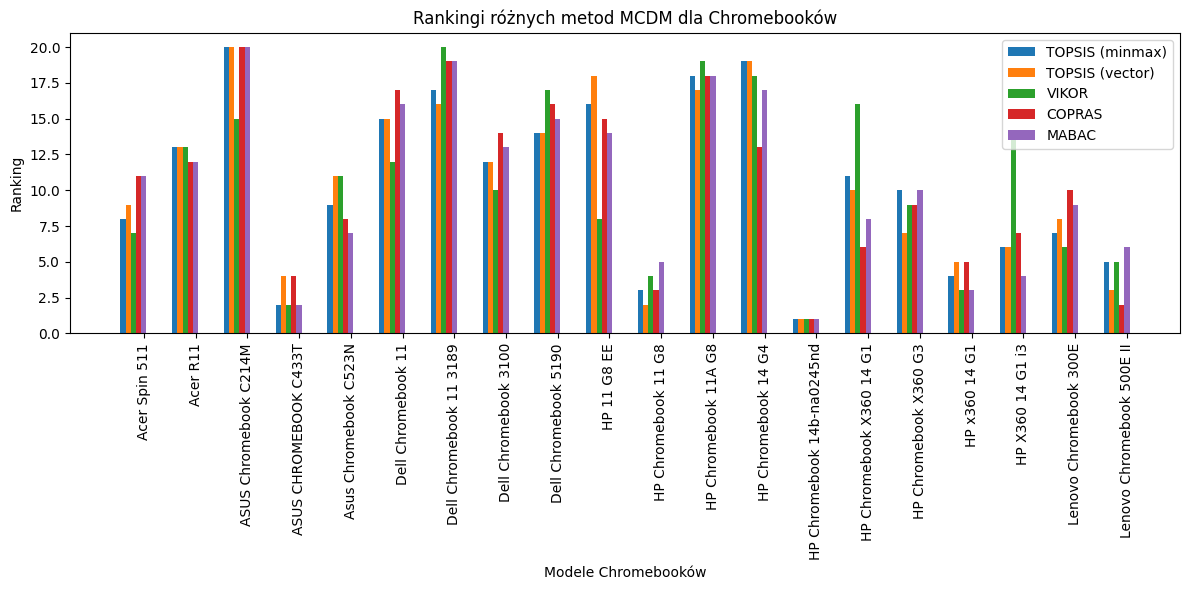

In [6]:
# Wykresy różnych metod

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.1
index = np.arange(len(chromebook_names))

for i, (method, ranking) in enumerate(rankings.items()):
    ax.bar(index + i * bar_width, ranking, bar_width, label=method)

ax.set_xlabel('Modele Chromebooków')
ax.set_ylabel('Ranking')
ax.set_title('Rankingi różnych metod MCDM dla Chromebooków')
ax.set_xticks(index + 0.4)
ax.set_xticklabels(chromebook_names, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


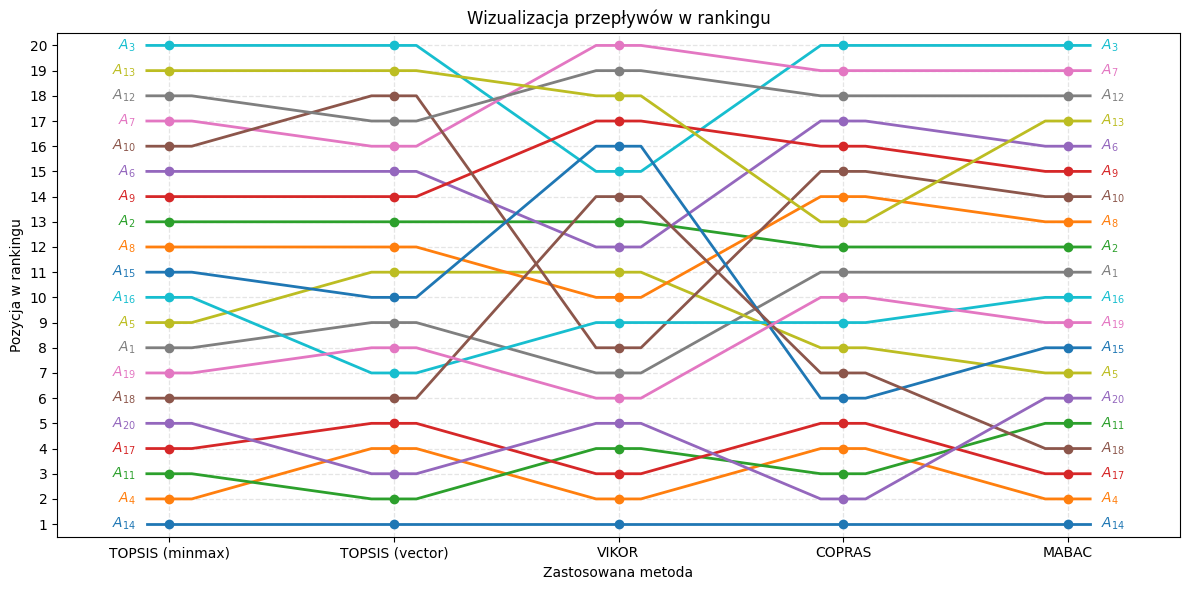

In [7]:
# Wyświetlenie rankingów przepływu
fig, ax = plt.subplots(figsize=(12, 6))

ranking_values = list(rankings.values())
pm.visuals.ranking_flows(ranking_values, labels=list(rankings.keys()), better_grid=True)

# Add axis labels (modify based on your ranking data)
plt.xlabel("Zastosowana metoda")
plt.ylabel("Pozycja w rankingu")
plt.title("Wizualizacja przepływów w rankingu")

plt.tight_layout()
plt.show()

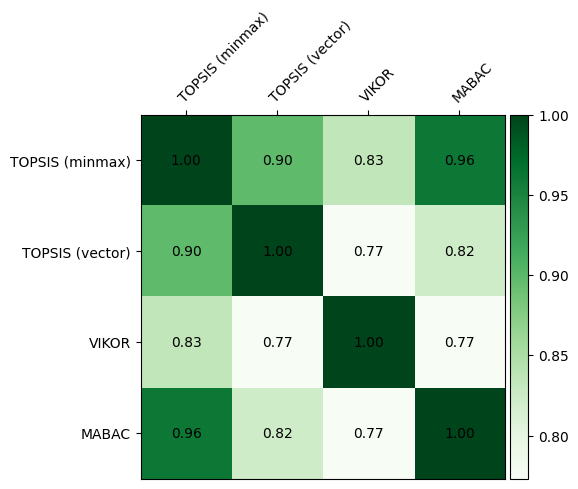

In [8]:

# Zdefiniowanie metod MCDM bez COPRAS
methods = {
    'TOPSIS (minmax)': pm.methods.TOPSIS(),
    'TOPSIS (vector)': pm.methods.TOPSIS(pm.normalizations.vector_normalization),
    'VIKOR': pm.methods.VIKOR(),
    'MABAC': pm.methods.MABAC()
}

# Obliczenie preferencji i rankingów
preferences = {}
rankings = {}
for name, method_function in methods.items():
    preferences[name] = method_function(chromebooks_normalized, weights, types)
    rankings[name] = method_function.rank(preferences[name])

# Zamiana rankingów na listy list, żeby móc je lepiej wyświetlić
ranking_lists = np.array(list(rankings.values()))

# Obliczenie macierzy korelacji
corr_matrix = np.corrcoef(ranking_lists)

# Wyświetlenie macierzy korelacji jako mapy cieplnej
fig, ax = plt.subplots(figsize=(5, 5))

pm.visuals.correlation_heatmap(corr_matrix,
                               labels=list(rankings.keys()),
                               labeltop=True,
                               colorbar=True)

plt.show()


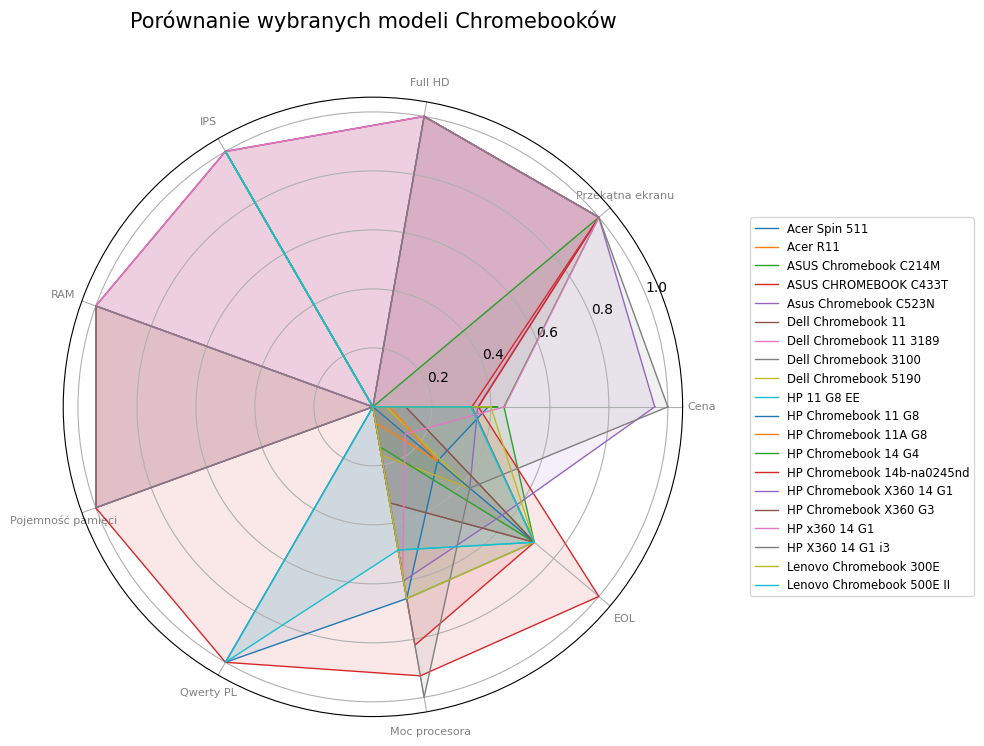

In [11]:
# Dane do wykresu radaru
df = pd.DataFrame(chromebooks_normalized, columns=["Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"])

# Wybierz kilka modeli do porównania
models_to_compare = list(range(20))  # Indeksy wszystkich modeli

# Wykres radaru dla wybranych modeli
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for model_index in models_to_compare:
    values = df.iloc[model_index].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(len(df.columns)) * 2 * pi for n in range(len(df.columns))]
    angles += angles[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=chromebook_names[model_index])
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], df.columns, color='grey', size=8)
ax.set_title('Porównanie wybranych modeli Chromebooków', size=15, color='black', y=1.1)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=1)  # Przesunięcie legendy na lewą stronę wykresu
plt.tight_layout()
plt.show()
